# Load the dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

master_sales = pd.read_csv("../data/master_sales.csv", parse_dates=["sale_date"])

In [3]:
# shape of the dataset
master_sales.shape

# preview the dataset
master_sales.head()

# statistical summary of the dataset
master_sales.describe()

# data types and missing values
master_sales.info()
master_sales.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   store_id      421570 non-null  int64         
 1   dept_id       421570 non-null  int64         
 2   sale_date     421570 non-null  datetime64[ns]
 3   weekly_sales  421570 non-null  float64       
 4   is_holiday    421570 non-null  bool          
 5   temperature   421570 non-null  float64       
 6   fuel_price    421570 non-null  float64       
 7   markdown1     150681 non-null  float64       
 8   markdown2     111248 non-null  float64       
 9   markdown3     137091 non-null  float64       
 10  markdown4     134967 non-null  float64       
 11  markdown5     151432 non-null  float64       
 12  cpi           421570 non-null  float64       
 13  unemployment  421570 non-null  float64       
 14  store_type    421570 non-null  object        
 15  store_size    421

store_id             0
dept_id              0
sale_date            0
weekly_sales         0
is_holiday           0
temperature          0
fuel_price           0
markdown1       270889
markdown2       310322
markdown3       284479
markdown4       286603
markdown5       270138
cpi                  0
unemployment         0
store_type           0
store_size           0
dtype: int64

Total weekly sales over time

In [6]:
# Group by date and calculate total weekly sales
weekly_sales_by_date = master_sales.groupby('sale_date')['weekly_sales'].sum()

# display the table
print(weekly_sales_by_date)

sale_date
2010-02-05    49751011.46
2010-02-12    48336922.57
2010-02-19    48278810.88
2010-02-26    43972310.17
2010-03-05    46873960.02
                 ...     
2012-09-28    43736527.72
2012-10-05    47567467.67
2012-10-12    46129305.71
2012-10-19    45122477.35
2012-10-26    45544642.77
Name: weekly_sales, Length: 143, dtype: float64


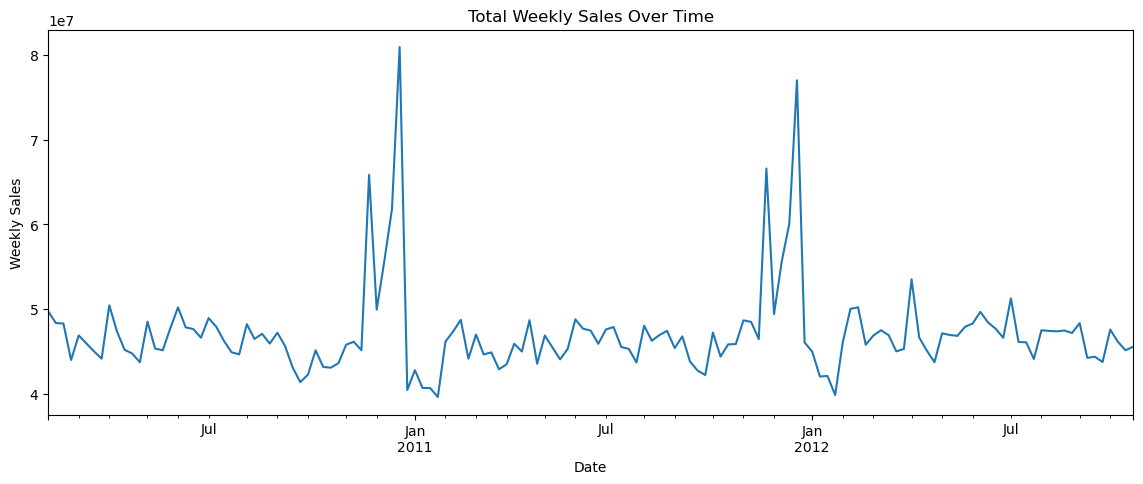

In [5]:
plt.figure(figsize=(14,5))
master_sales.groupby('sale_date')['weekly_sales'].sum().plot()
plt.title("Total Weekly Sales Over Time")
plt.ylabel("Weekly Sales")
plt.xlabel("Date")
plt.show()


Total sales by year and month

year
2010    2.288952e+09
2011    2.448265e+09
2012    2.000178e+09
Name: weekly_sales, dtype: float64


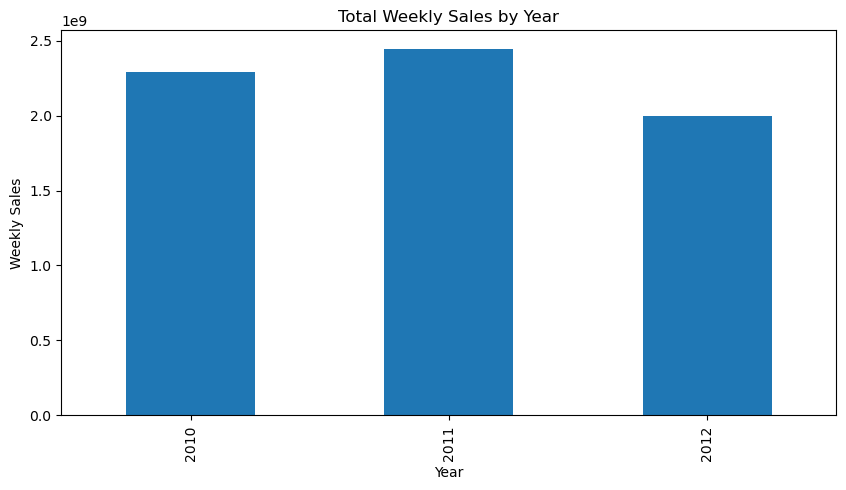

In [7]:
# Creating time columns
master_sales['year'] = master_sales['sale_date'].dt.year
master_sales['month'] = master_sales['sale_date'].dt.month
master_sales['week'] = master_sales['sale_date'].dt.isocalendar().week

# Sales by Year
sales_by_year = master_sales.groupby('year')['weekly_sales'].sum()
print(sales_by_year)

# Plotting Sales by Year
plt.figure(figsize=(10,5))
sales_by_year.plot(kind='bar')
plt.title("Total Weekly Sales by Year")
plt.ylabel("Weekly Sales")
plt.xlabel("Year")
plt.show()

month
1     3.326053e+08
2     5.687399e+08
3     5.928089e+08
4     6.468718e+08
5     5.571339e+08
6     6.226371e+08
7     6.500169e+08
8     6.131055e+08
9     5.787891e+08
10    5.848060e+08
11    4.130214e+08
12    5.768595e+08
Name: weekly_sales, dtype: float64


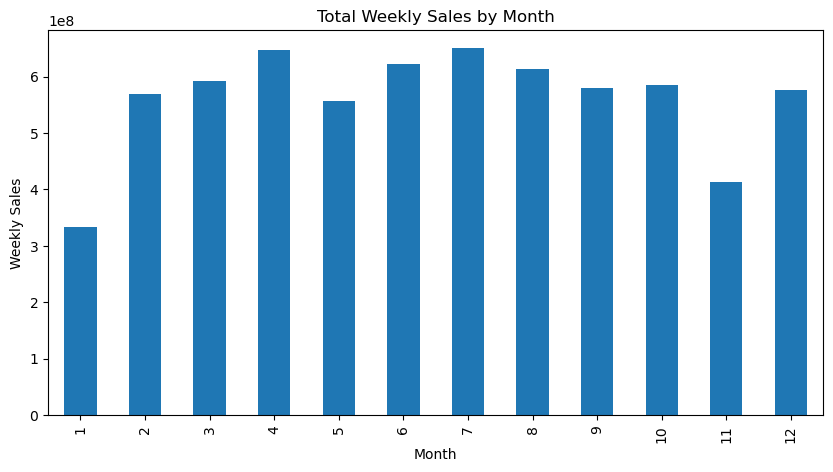

In [8]:
# Sales by Month
sales_by_month = master_sales.groupby('month')['weekly_sales'].sum()
print(sales_by_month)

# Plotting Sales by Month
plt.figure(figsize=(10,5))
sales_by_month.plot(kind='bar')
plt.title("Total Weekly Sales by Month")
plt.ylabel("Weekly Sales")
plt.xlabel("Month")
plt.show()

Sales by store and department

store_id
1     2.224107e+08
2     2.753919e+08
3     5.758912e+07
4     2.995466e+08
5     4.547655e+07
6     2.237610e+08
7     8.160072e+07
8     1.299518e+08
9     7.779311e+07
10    2.716305e+08
11    1.939660e+08
12    1.442951e+08
13    2.865182e+08
14    2.890038e+08
15    8.913605e+07
16    7.426104e+07
17    1.277842e+08
18    1.551169e+08
19    2.066405e+08
20    3.014050e+08
21    1.081212e+08
22    1.470779e+08
23    1.987549e+08
24    1.940172e+08
25    1.010625e+08
26    1.434168e+08
27    2.538585e+08
28    1.892793e+08
29    7.714410e+07
30    6.271714e+07
31    1.996160e+08
32    1.668223e+08
33    3.716043e+07
34    1.382555e+08
35    1.315393e+08
36    5.341449e+07
37    7.420298e+07
38    5.516017e+07
39    2.074474e+08
40    1.378730e+08
41    1.813438e+08
42    7.957033e+07
43    9.056763e+07
44    4.329426e+07
45    1.123993e+08
Name: weekly_sales, dtype: float64


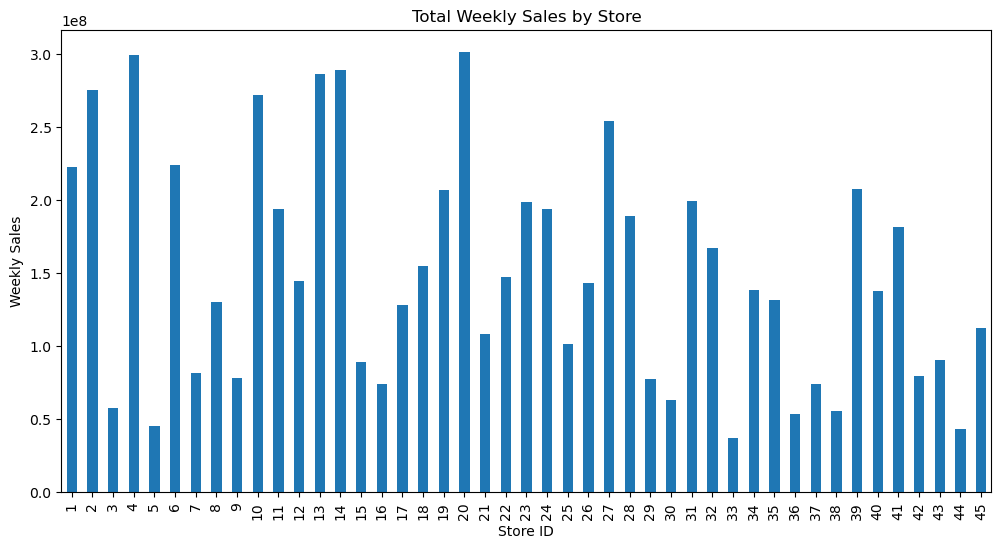

In [13]:
# Total sales by store
sales_by_store = master_sales.groupby('store_id')['weekly_sales'].sum()
print(sales_by_store)

# Plotting Sales by Store
plt.figure(figsize=(12,6))
sales_by_store.plot(kind='bar')
plt.title("Total Weekly Sales by Store")
plt.ylabel("Weekly Sales")
plt.xlabel("Store ID")
plt.show()

dept_id
1     1.236388e+08
2     2.806112e+08
3     7.589245e+07
4     1.671467e+08
5     1.356074e+08
          ...     
95    4.493202e+08
96    7.383449e+07
97    8.949655e+07
98    3.982922e+07
99    3.586688e+05
Name: weekly_sales, Length: 81, dtype: float64


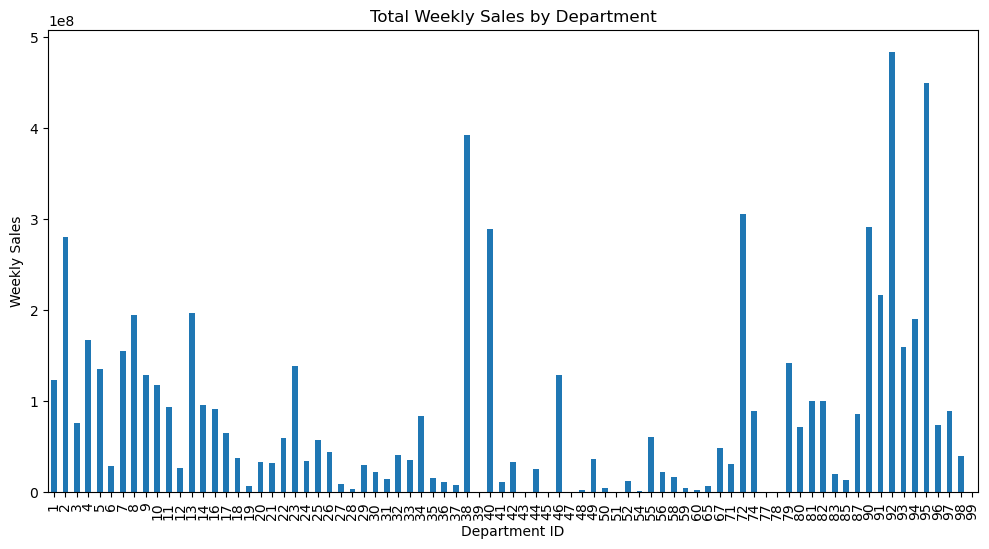

In [14]:
# Total sales by department
sales_by_dept = master_sales.groupby('dept_id')['weekly_sales'].sum()
print(sales_by_dept)

# Plotting Sales by Department
plt.figure(figsize=(12,6))
sales_by_dept.plot(kind='bar')
plt.title("Total Weekly Sales by Department")
plt.ylabel("Weekly Sales")
plt.xlabel("Department ID")
plt.show()

dept_id
92    4.839433e+08
95    4.493202e+08
38    3.931181e+08
72    3.057312e+08
90    2.910685e+08
40    2.889360e+08
2     2.806112e+08
91    2.167817e+08
13    1.973216e+08
8     1.942808e+08
Name: weekly_sales, dtype: float64


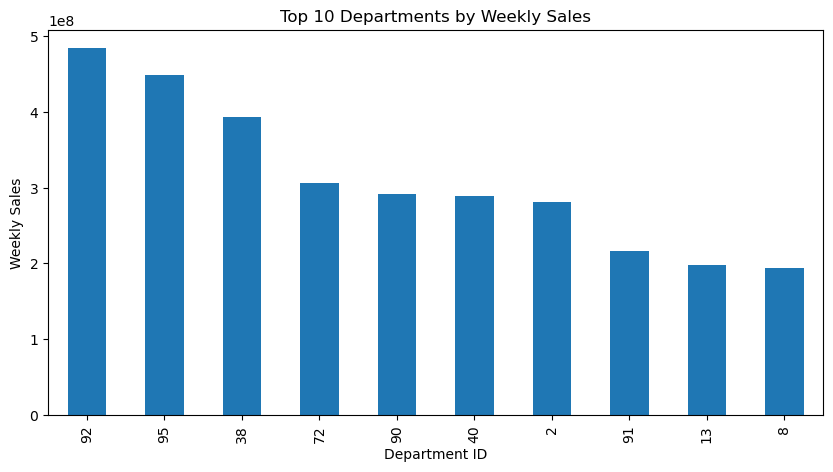

dept_id
43         14.32
39        177.98
78       2419.11
51      31449.87
45      46056.19
77      50439.01
47     101413.19
99     358668.81
54     525954.25
60    2005037.96
Name: weekly_sales, dtype: float64


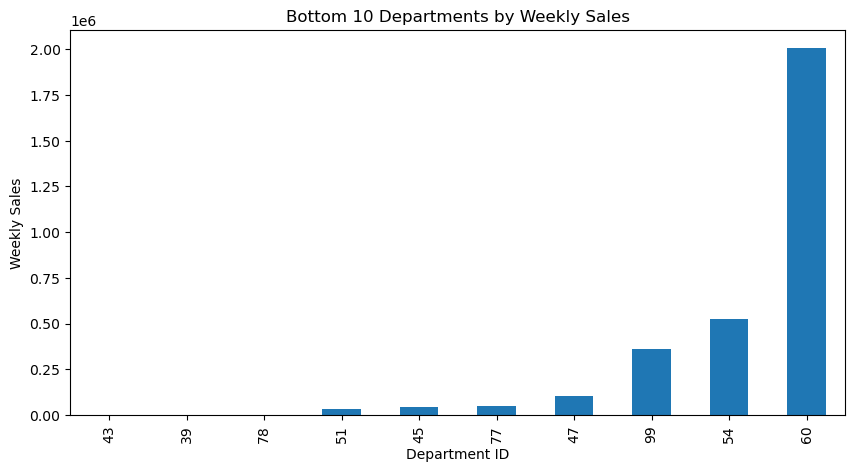

In [18]:
# Top departments by sales
top_depts = sales_by_dept.sort_values(ascending=False).head(10)
print(top_depts)

# Plotting Top Departments by Sales
plt.figure(figsize=(10,5))
top_depts.plot(kind='bar')
plt.title("Top 10 Departments by Weekly Sales")
plt.ylabel("Weekly Sales")
plt.xlabel("Department ID")
plt.show()

# Worst departments by sales
worst_depts = sales_by_dept.sort_values(ascending=True).head(10)
print(worst_depts)

# Plotting Worst Departments by Sales
plt.figure(figsize=(10,5))
worst_depts.plot(kind='bar')
plt.title("Bottom 10 Departments by Weekly Sales")
plt.ylabel("Weekly Sales")
plt.xlabel("Department ID")
plt.show()

From the visualization above we can conclude that the department with a department_id of 92 is the best performing department and the department with a department_id of 43 is the worst performing department.

Holiday Vs Non-Holiday Sales

is_holiday
False    15901.854235
True     17036.361510
Name: weekly_sales, dtype: float64


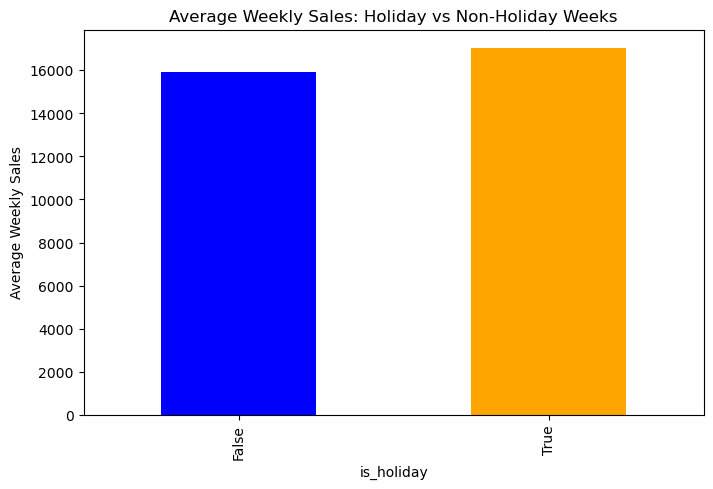

In [16]:
# Average sales comparison between holiday and non-holiday weeks
avg_sales_holiday = master_sales.groupby('is_holiday')['weekly_sales'].mean()
print(avg_sales_holiday)

# Plotting Average Sales for Holiday vs Non-Holiday Weeks
plt.figure(figsize=(8,5))
avg_sales_holiday.plot(kind='bar', color=['blue', 'orange'])
plt.title("Average Weekly Sales: Holiday vs Non-Holiday Weeks")
plt.ylabel("Average Weekly Sales")
plt.show()

From the visualization above we can see that there are more sales during the holidays. Telling us that holidays boosts sales.

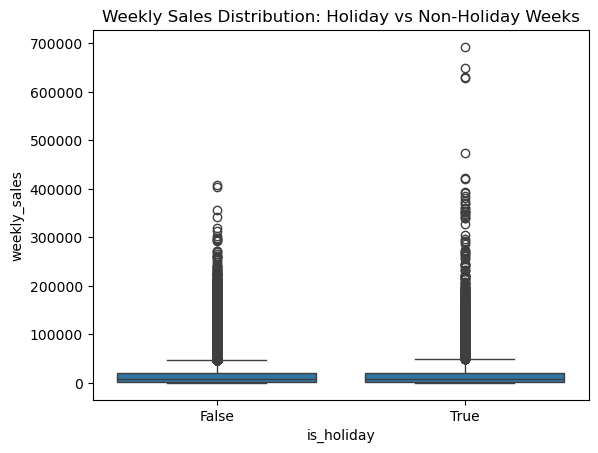

In [17]:
# Another way of plotting holiday vs non-holiday sales

sns.boxplot(x='is_holiday', y='weekly_sales', data=master_sales)
plt.title("Weekly Sales Distribution: Holiday vs Non-Holiday Weeks")  
plt.show()

Impact of Economic factors on sales

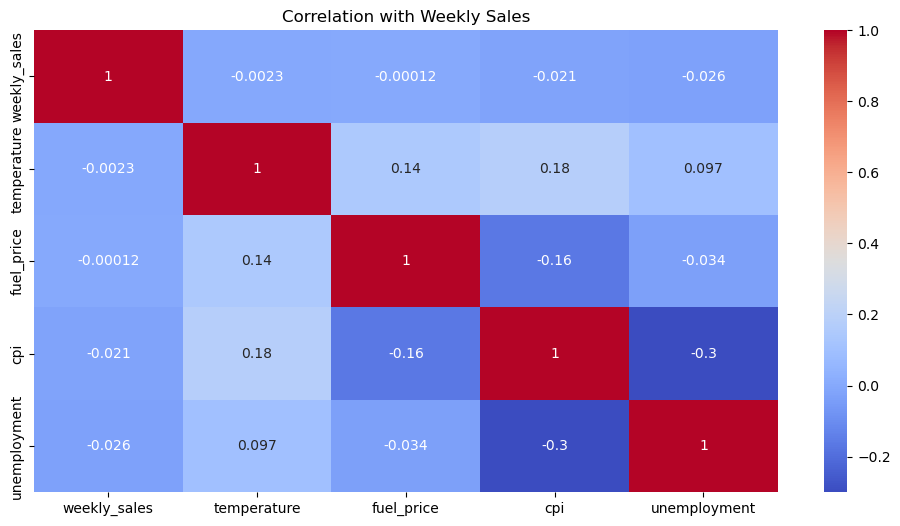

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(master_sales[['weekly_sales','temperature','fuel_price','cpi','unemployment']].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation with Weekly Sales")
plt.show()


From the correlation map above, we can see that the values are closer to zero meaning these factors does not explain the changes in weekly sales.
We can therefore conclude that Weekly sales are not influenced by temperature, fuel price, CPI and unemployment.


In [20]:
# We calculate the total markdown amount and add it as a new column
master_sales['total_markdown'] = (master_sales['markdown1'].fillna(0) +
                                  master_sales['markdown2'].fillna(0) +
                                    master_sales['markdown3'].fillna(0) +
                                    master_sales['markdown4'].fillna(0) +
                                    master_sales['markdown5'].fillna(0))
master_sales.head()

,store_id,dept_id,sale_date,weekly_sales,is_holiday,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,store_type,store_size,year,month,week,total_markdown
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,0.0
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,2010,2,6,0.0
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2010,2,7,0.0
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,2010,2,8,0.0
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,2010,3,9,0.0


In [21]:
# correlaion between total markdown and weekly sales
correlation = master_sales['total_markdown'].corr(master_sales['weekly_sales'])
print(f"Correlation between Total Markdown and Weekly Sales: {correlation}")

Correlation between Total Markdown and Weekly Sales: 0.0652366725887346


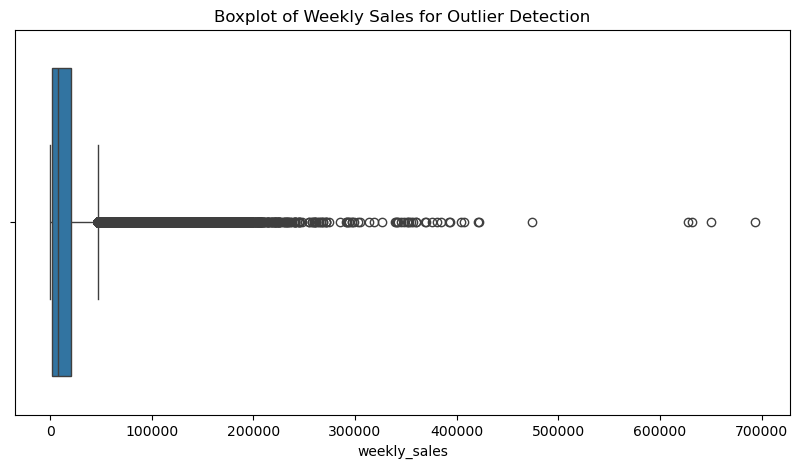

In [23]:
# Outlier detection using boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x=master_sales['weekly_sales'])
plt.title("Boxplot of Weekly Sales for Outlier Detection")
plt.show()

Store level time series for Store 1

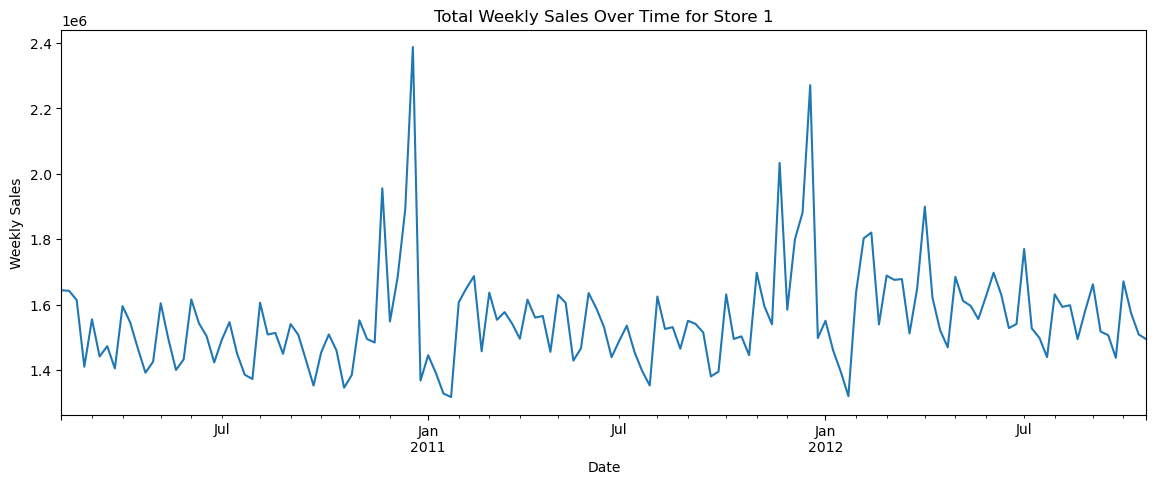

In [24]:
# store 1 level analysis
store_1_sales = master_sales[master_sales['store_id'] == 1]

plt.figure(figsize=(14,5))
store_1_sales.groupby('sale_date')['weekly_sales'].sum().plot()
plt.title("Total Weekly Sales Over Time for Store 1")
plt.ylabel("Weekly Sales")
plt.xlabel("Date")
plt.show()

From the chart above, we can make the following conclusions:
- There are sales spikes in late 2010 or early 2011 and late 2011 or early 2012.
- Sales remain relatively stable over time

In [25]:
# Merging the data with additional datasets

master_sales.to_csv("../data/master_sales_v2.csv", index=False)